In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [5]:
flights = pd.read_csv(r"C:\Users\DELL\Downloads\archive (3)\flights.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_13940\2667858793.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(r"C:\Users\DELL\Downloads\archive (3)\flights.csv")


In [7]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [11]:
flights['FL_DATE'] = pd.to_datetime(flights[['YEAR','MONTH','DAY']])

In [13]:
flights['FL_DATE']

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: FL_DATE, Length: 5819079, dtype: datetime64[ns]

In [15]:
flights['Delayed'] = flights['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)
daily_delay = flights.groupby('FL_DATE')['Delayed'].sum().reset_index()
daily_delay.rename(columns={'Delayed': 'Total_Delayed_Flights'}, inplace=True)

In [17]:
daily_delay.set_index('FL_DATE', inplace=True)

In [19]:
daily_delay

,Total_Delayed_Flights
FL_DATE,
2015-01-01,5850
2015-01-02,8171
2015-01-03,9548
2015-01-04,10738
2015-01-05,9386
...,...
2015-12-27,9464
2015-12-28,8599
2015-12-29,10245


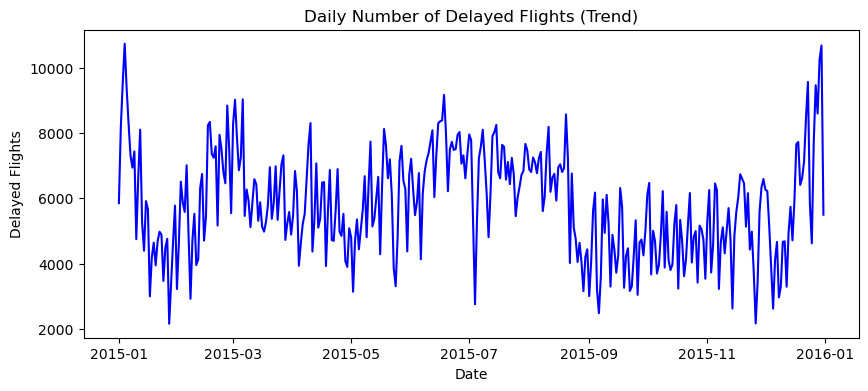

In [21]:
plt.figure(figsize=(10,4))
plt.plot(daily_delay['Total_Delayed_Flights'], color='blue')
plt.title("Daily Number of Delayed Flights (Trend)")
plt.xlabel("Date")
plt.ylabel("Delayed Flights")
plt.show()

In [23]:
result = adfuller(daily_delay['Total_Delayed_Flights'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is NOT stationary (has trend or seasonality). You may need differencing/log transform.")


ADF Statistic: -3.1184662122339852
p-value: 0.025216446905640223
The series is stationary.


<Figure size 1000x400 with 0 Axes>

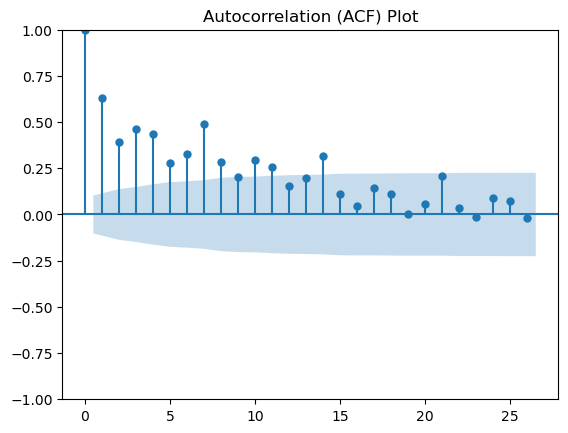

<Figure size 1000x400 with 0 Axes>

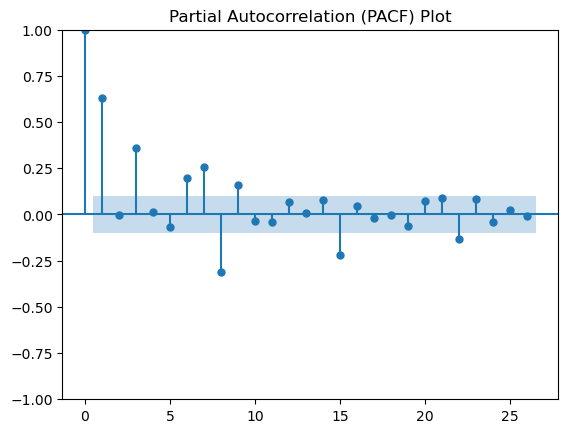

In [27]:
plt.figure(figsize=(10,4))
plot_acf(daily_delay['Total_Delayed_Flights'])
plt.title("Autocorrelation (ACF) Plot")
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(daily_delay['Total_Delayed_Flights'], method='ywm')
plt.title("Partial Autocorrelation (PACF) Plot")
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D

In [31]:
data = daily_delay.copy()

In [33]:
scaler = MinMaxScaler()
data['scaled'] = scaler.fit_transform(data[['Total_Delayed_Flights']])

In [35]:
window = 30
X, y = [], []
values = data['scaled'].values

for i in range(window, len(values)):
    X.append(values[i-window:i])
    y.append(values[i])

In [37]:
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))
print("Input shape:", X.shape)

Input shape: (335, 30, 1)


In [39]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [41]:
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/30


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1491 - val_loss: 0.0345
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0300 - val_loss: 0.0372
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0268 - val_loss: 0.0335
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0223 - val_loss: 0.0332
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0259 - val_loss: 0.0339
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0204 - val_loss: 0.0325
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0200 - val_loss: 0.0332
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0226 - val_loss: 0.0323
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0242 - val_loss: 0.0321
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0224 - val_loss: 0.0329
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0231 - val_loss: 0.0320
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - val_l

In [42]:
model_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_cnn_lstm.compile(optimizer='adam', loss='mse')
history_cnn = model_cnn_lstm.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/30


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1160 - val_loss: 0.0355
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0278 - val_loss: 0.0355
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0216 - val_loss: 0.0346
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0216 - val_loss: 0.0347
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0240 - val_loss: 0.0340
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0233 - val_loss: 0.0335
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0212 - val_loss: 0.0353
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0218 - val_loss: 0.0336
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0235 - val_loss: 0.0342
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0202 - val_loss: 0.0339
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0227 - val_loss: 0.0340
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0234 - val_l

In [45]:
y_pred_lstm = model_lstm.predict(X_test)
y_pred_cnn = model_cnn_lstm.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step 


In [47]:
# Inverse transform to original scale
y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)
y_pred_cnn_inv = scaler.inverse_transform(y_pred_cnn)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

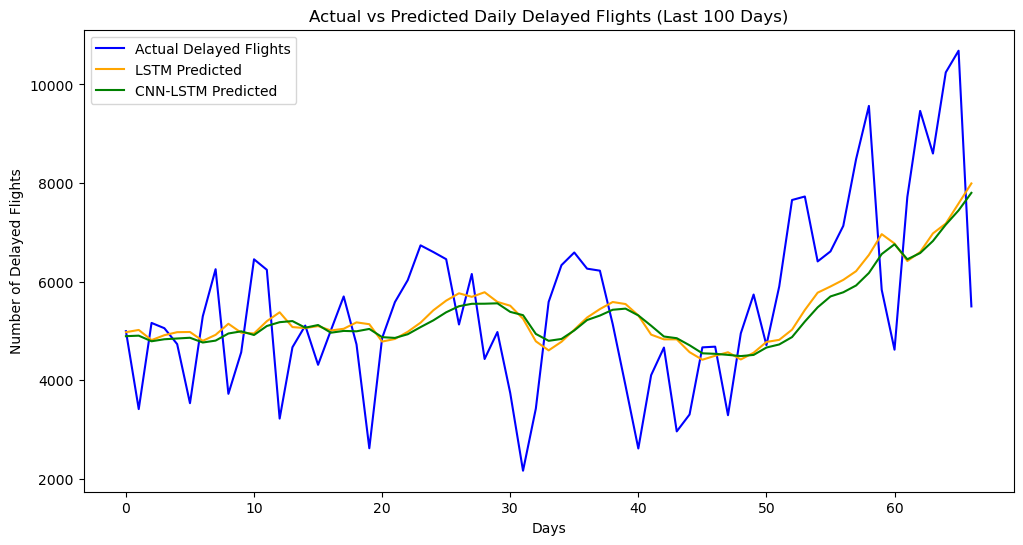

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv[-100:], label='Actual Delayed Flights', color='blue')
plt.plot(y_pred_lstm_inv[-100:], label='LSTM Predicted', color='orange')
plt.plot(y_pred_cnn_inv[-100:], label='CNN-LSTM Predicted', color='green')
plt.title("Actual vs Predicted Daily Delayed Flights (Last 100 Days)")
plt.xlabel("Days")
plt.ylabel("Number of Delayed Flights")
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lstm = mean_squared_error(y_test_inv, y_pred_lstm_inv)
r2_lstm = r2_score(y_test_inv, y_pred_lstm_inv)

mse_cnn = mean_squared_error(y_test_inv, y_pred_cnn_inv)
r2_cnn = r2_score(y_test_inv, y_pred_cnn_inv)

print("LSTM -> MSE:", mse_lstm, " | R²:", r2_lstm)
print("CNN-LSTM -> MSE:", mse_cnn, " | R²:", r2_cnn)


LSTM -> MSE: 2219883.786142837  | R²: 0.3005406272706387
CNN-LSTM -> MSE: 2318691.2198072653  | R²: 0.2694075625564698


In [53]:
last_seq = values[-window:]
future_preds = []

for _ in range(7):
    X_input = last_seq.reshape(1, window, 1)
    pred = model_cnn_lstm.predict(X_input)
    future_preds.append(pred[0,0])
    last_seq = np.append(last_seq[1:], pred[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [55]:
future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

In [57]:
# Create future dates (7 days ahead)
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=8, freq='D')[1:]  # next 7 days

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Delayed_Flights': future_preds_inv.flatten()
})
forecast_df

,Date,Predicted_Delayed_Flights
0,2016-01-01,7890.854004
1,2016-01-02,7700.899414
2,2016-01-03,7765.615234
3,2016-01-04,7501.964844
4,2016-01-05,7464.017578
5,2016-01-06,7272.795898
6,2016-01-07,7233.639648


In [59]:
# Take last 30 days of actual data for comparison
recent_actual = data.tail(30).copy()
recent_actual = recent_actual[['Total_Delayed_Flights']]
recent_actual = recent_actual.reset_index()
recent_actual.rename(columns={'FL_DATE': 'Date', 'Total_Delayed_Flights': 'Actual_Delayed_Flights'}, inplace=True)

# Combine both
combined = pd.concat([
    recent_actual,
    forecast_df
], ignore_index=True)


In [61]:
combined

,Date,Actual_Delayed_Flights,Predicted_Delayed_Flights
0,2015-12-02,6222.0,NaN
1,2015-12-03,5139.0,NaN
2,2015-12-04,3890.0,NaN
3,2015-12-05,2614.0,NaN
4,2015-12-06,4102.0,NaN
5,2015-12-07,4662.0,NaN
6,2015-12-08,2961.0,NaN
7,2015-12-09,3304.0,NaN
8,2015-12-10,4666.0,NaN
9,2015-12-11,4680.0,NaN


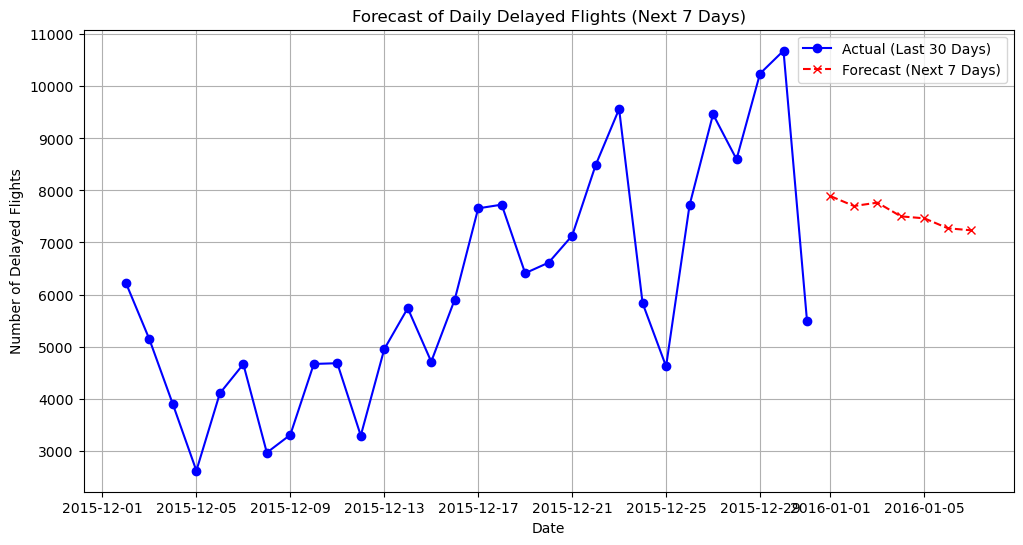

In [63]:
plt.figure(figsize=(12,6))
plt.plot(recent_actual['Date'], recent_actual['Actual_Delayed_Flights'], label='Actual (Last 30 Days)', color='blue', marker='o')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Delayed_Flights'], label='Forecast (Next 7 Days)', color='red', marker='x', linestyle='--')
plt.title("Forecast of Daily Delayed Flights (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Number of Delayed Flights")
plt.legend()
plt.grid(True)
plt.show()
